<a href="https://colab.research.google.com/github/rich-hyun/medical_image/blob/main/process_imgae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#라이브러리 다운로드

In [46]:
!sudo apt install tesseract-ocr
!pip install pytesseract Pillow
!pip install pytesseract
!pip install pillow # 이미지 처리를 위한 라이브러리
!pip install tensorflow
!!pip install pyocr
!sudo apt-get install tesseract-ocr-kor
!sudo apt-get install tesseract-ocr-kor tesseract-ocr-eng
!pip install pytesseract pillow requests

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-kor is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-kor is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


# 파일 불러오기

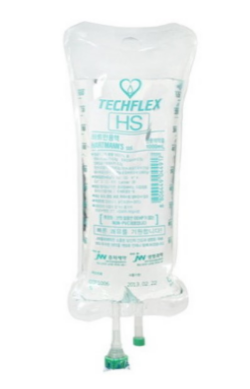

In [47]:
# 필요한 라이브러리를 불러옵니다.
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# 변환된 raw 이미지 URL
image_url = 'https://raw.githubusercontent.com/rich-hyun/medical_image/main/HS1.jpg'

# 이미지 데이터 요청
response = requests.get(image_url)

# 받은 이미지 데이터로부터 이미지 객체 생성
image = Image.open(BytesIO(response.content))

# 이미지를 화면에 표시
plt.imshow(image)
plt.axis('off')  # 축 제거
plt.show()

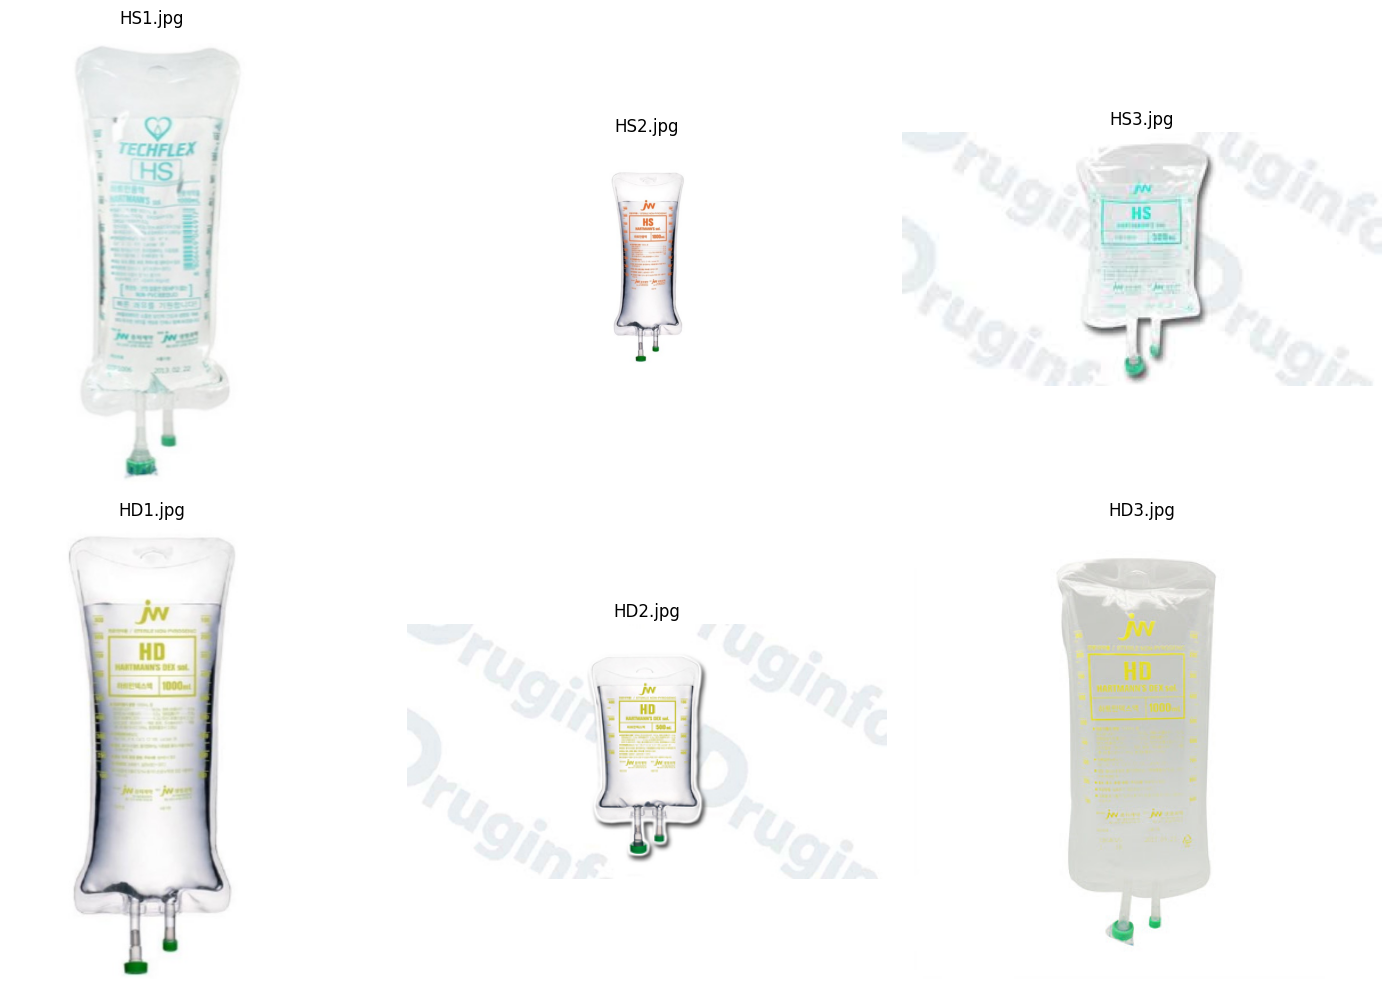

In [48]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# 파일 이름 목록
file_names = ["HS1", "HS2", "HS3", "HD1", "HD2", "HD3"]

# 기본 URL
base_url = "https://raw.githubusercontent.com/rich-hyun/medical_image/main/"

# 전체 화면에 여러 개의 subplot을 생성하기 위한 설정
fig, axs = plt.subplots(len(file_names)//3 + len(file_names)%3, 3, figsize=(15, 5 * (len(file_names)//3 + len(file_names)%3)))
axs = axs.flatten()  # 2차원 배열을 1차원 배열로 변환

for i, file_name in enumerate(file_names):
    # 파일 확장자(.jpg) 추가
    file_name = file_name.replace(" ", "%20") + ".jpg"  # URL에서 공백을 처리하기 위해 "%20"으로 변환
    image_url = base_url + file_name

    # 이미지 불러오기
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))

    # 이미지 표시
    axs[i].imshow(image)
    axs[i].set_title(file_name)
    axs[i].axis('off')  # 축 숨김

plt.tight_layout()
plt.show()

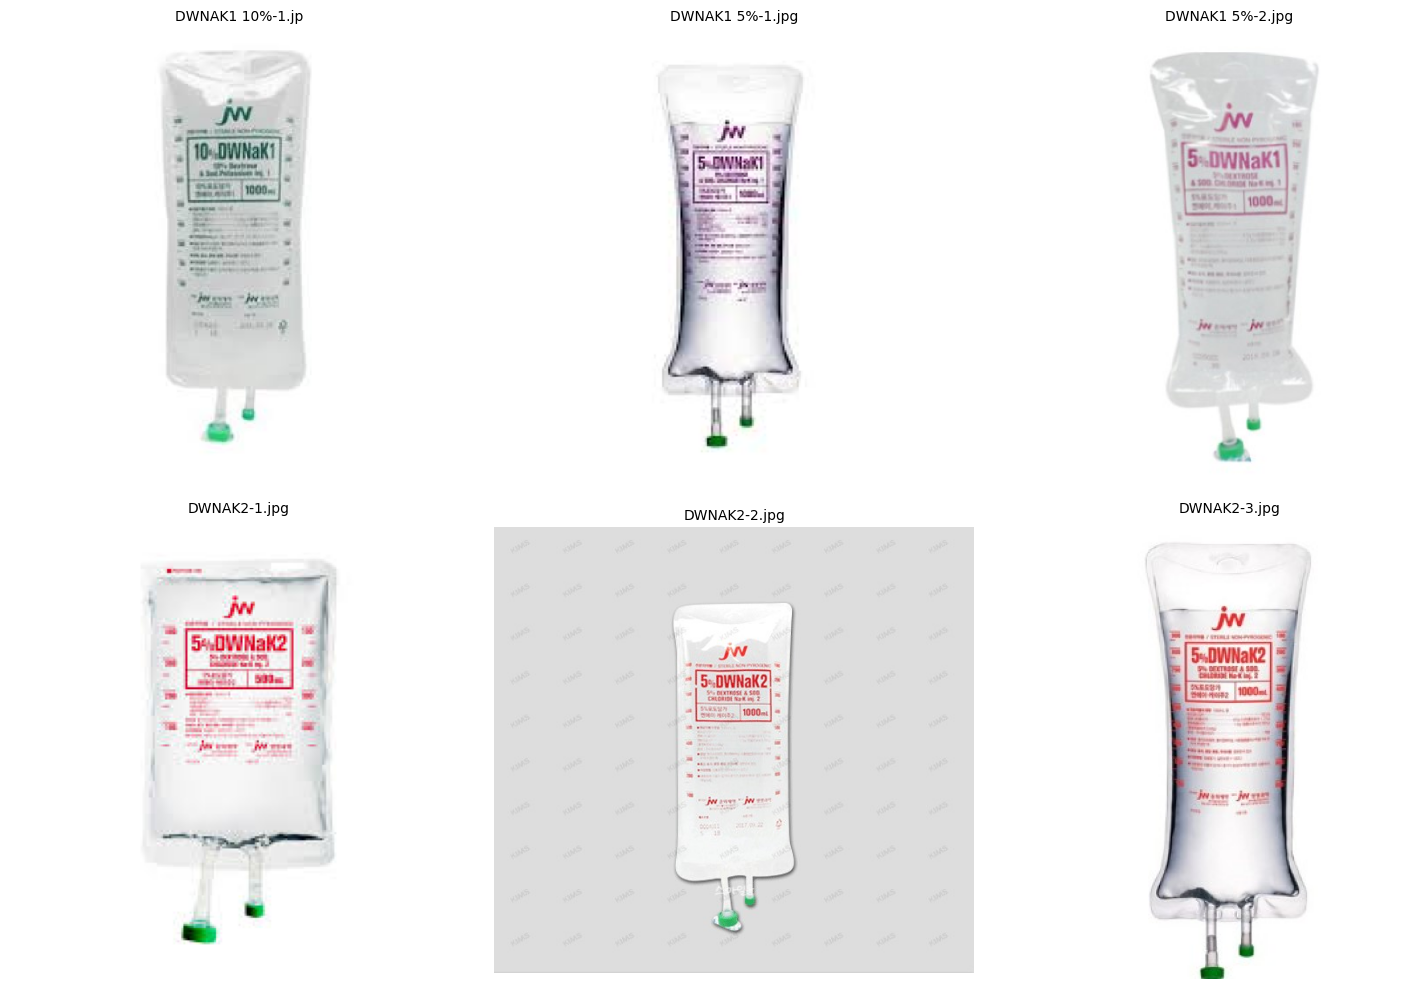

In [49]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# 이미지 파일 목록
file_names = [
    "DWNAK1 10%-1.jpg",
    "DWNAK1 5%-1.jpg",
    "DWNAK1 5%-2.jpg",
    "DWNAK2-1.jpg",
    "DWNAK2-2.jpg",
    "DWNAK2-3.jpg"
]

# 기본 URL
base_url = "https://raw.githubusercontent.com/rich-hyun/medical_image/main/"

# 이미지를 불러와서 표시
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10)) # 행과 열의 수 조정

axs = axs.ravel() # 다차원 배열을 1차원으로 변환

for idx, file_name in enumerate(file_names):
    # URL에서 공간을 "%20"로, "%"를 "%25"로 변경
    encoded_file_name = file_name.replace("%", "%25").replace(" ", "%20")
    complete_url = f"{base_url}{encoded_file_name}"

    # 이미지 데이터 요청
    response = requests.get(complete_url)

    # 이미지 객체 생성 및 표시
    image = Image.open(BytesIO(response.content))
    axs[idx].imshow(image)
    axs[idx].set_axis_off() # 축 제거

    # 원본 파일명을 이용하여 타이틀 설정
    axs[idx].set_title(file_name[:15], fontsize=10) # 제목을 파일명의 처음 15글자로 설정

# 남은 subplot 숨기기
for ax in axs[len(file_names):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

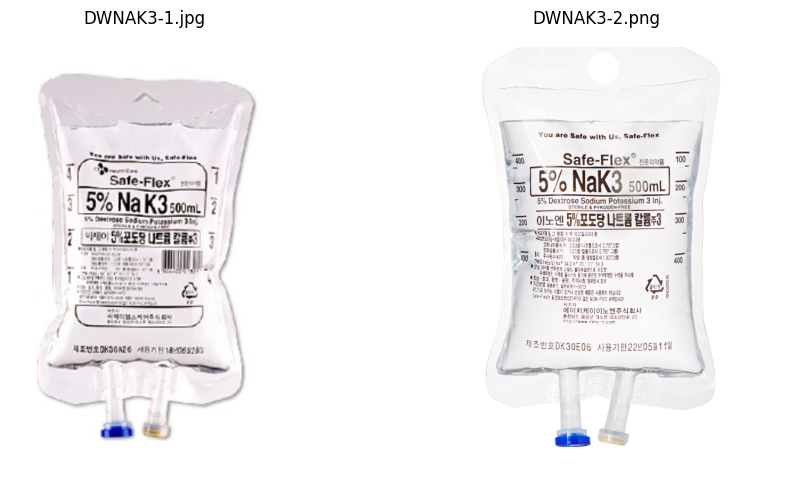

In [50]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# GitHub의 raw content 주소로 변환
base_url = "https://raw.githubusercontent.com/rich-hyun/medical_image/main/"
file_names = ["DWNAK3-1.jpg", "DWNAK3-2.png"]

# 이미지를 읽고 화면에 표시
plt.figure(figsize=(10, 5))  # 전체 figure 크기 설정
for i, file_name in enumerate(file_names):
    image_url = f"{base_url}{file_name}"
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    plt.subplot(1, len(file_names), i+1)  # 1행, 파일 개수만큼의 열, 현재 인덱스 위치
    plt.imshow(image)
    plt.title(file_name[:15])  # 파일 이름으로 제목 설정
    plt.axis('off')  # 축 제거
plt.tight_layout()
plt.show()

#메모장 테스트

## 이미지 확인

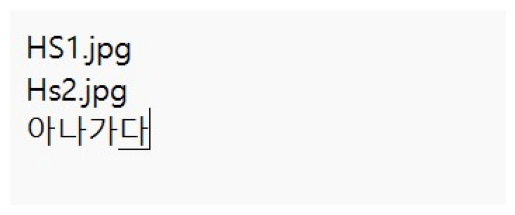

In [51]:
#이미지 확인

import cv2
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

# 이미지 URL
image_url = "https://github.com/rich-hyun/medical_image/blob/main/practice_image2.jpg?raw=true"

# 이미지를 불러옵니다.
resp = urllib.request.urlopen(image_url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# OpenCV는 BGR 순서로 색상을 처리하기 때문에, matplotlib에서 이미지를 올바르게 보기 위해 RGB로 변환합니다.
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 이미지를 출력합니다.
plt.imshow(image_rgb)
plt.axis('off')  # 축을 숨깁니다.
plt.show()

## pytesseract model

In [52]:
#컬러일때

import cv2
import pytesseract
import urllib.request
import numpy as np

# 이미지 URL
image_url = "https://github.com/rich-hyun/medical_image/blob/main/practice_image2.jpg?raw=true"

# 이미지를 불러옵니다.
resp = urllib.request.urlopen(image_url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# 이미지를 흑백으로 변환하여 글자를 더 잘 인식할 수 있게 합니다.
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# pytesseract를 사용하여 이미지에서 글자를 읽습니다. 한글 인식을 위해 'kor' 언어 옵션을 사용합니다.
text = pytesseract.image_to_string(binary_image, lang='kor+eng')

print(text)

SMB ore}
Hs2jpg
아나가대



In [53]:
# 흑백일때
from PIL import Image
import pytesseract
import requests
from io import BytesIO

# 이미지 URL
image_url = "https://github.com/rich-hyun/medical_image/blob/main/practice_image2.jpg?raw=true"

# requests를 사용하여 이미지 다운로드
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# OCR 처리 (한글, 영어 인식 설정)
custom_config = r'--oem 3 --psm 6 -l kor+eng'
text = pytesseract.image_to_string(image, config=custom_config)

print(text)

HS1 jpg
Hs2.jpg
아나가대



## ocr model

In [54]:
import cv2
import pytesseract
import urllib.request
import numpy as np
# 이미지 URL
image_url = "https://github.com/rich-hyun/medical_image/blob/main/practice_image2.jpg?raw=true"

# 이미지를 불러옵니다.
resp = urllib.request.urlopen(image_url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# 이미지를 흑백으로 변환합니다.
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [55]:
#흑백전환 ->한글 + 영어 + 숫자 인식 확인

# pytesseract를 사용하여 흑백 이미지에서 글자를 읽습니다. 한글 인식을 위해 'kor' 언어 옵션을 사용합니다.
text = pytesseract.image_to_string(gray_image, lang='kor+eng')

print(text)

HS1 jpg
Hs2.jpg
아나가대



In [56]:
import cv2
import sys
import numpy as np
import urllib.request
from PIL import Image
import pyocr
import pyocr.builders

# OCR 엔진 초기화
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("OCR 도구를 찾을 수 없습니다.")
    sys.exit(1)
tool = tools[0]

# 이미지를 불러온 후 흑백으로 변환
image_url = "https://github.com/rich-hyun/medical_image/blob/main/practice_image2.jpg?raw=true"

# URL에서 이미지를 읽어서 NumPy 배열로 변환
resp = urllib.request.urlopen(image_url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# 이미지를 흑백으로 변환
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# OpenCV 이미지를 PIL 이미지로 변환
pil_image = Image.fromarray(gray_image)

# pyocr을 사용해 이미지에서 텍스트 추출
text = tool.image_to_string(
    pil_image,
    lang='eng+kor',  # 영어와 한글 동시 인식
    builder=pyocr.builders.TextBuilder()
)

# 추출된 텍스트 출력
print(text)

HS1 jpg

Hs2.jpg
아 나 가대


## 쓸모없는거 버리기

In [57]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# CIFAR-10 데이터셋 로드 및 전처리
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# VGGNet 스타일의 모델 구조 정의
def build_vgg_style_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# 모델 생성, 컴파일 및 학습
model = build_vgg_style_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

#이미지 처리 1단계: 정면 글자읽기

##HS

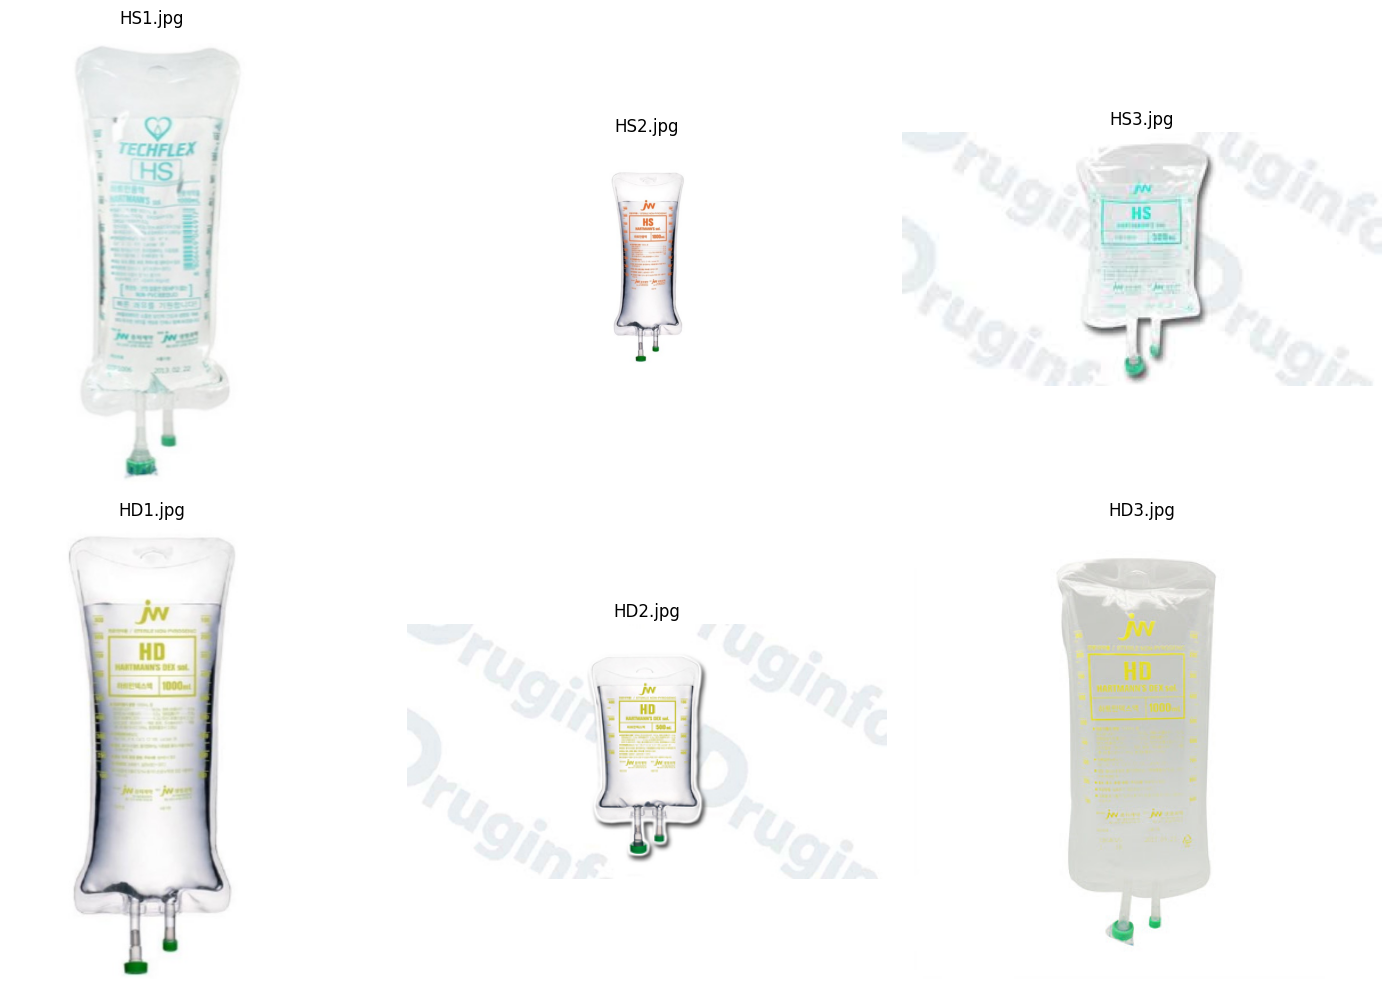

In [58]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# 파일 이름 목록
file_names = ["HS1", "HS2", "HS3", "HD1", "HD2", "HD3"]

# 기본 URL
base_url = "https://raw.githubusercontent.com/rich-hyun/medical_image/main/"

# 전체 화면에 여러 개의 subplot을 생성하기 위한 설정
fig, axs = plt.subplots(len(file_names)//3 + len(file_names)%3, 3, figsize=(15, 5 * (len(file_names)//3 + len(file_names)%3)))
axs = axs.flatten()  # 2차원 배열을 1차원 배열로 변환

for i, file_name in enumerate(file_names):
    # 파일 확장자(.jpg) 추가
    file_name = file_name.replace(" ", "%20") + ".jpg"  # URL에서 공백을 처리하기 위해 "%20"으로 변환
    image_url = base_url + file_name

    # 이미지 불러오기
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))

    # 이미지 표시
    axs[i].imshow(image)
    axs[i].set_title(file_name)
    axs[i].axis('off')  # 축 숨김

plt.tight_layout()
plt.show()

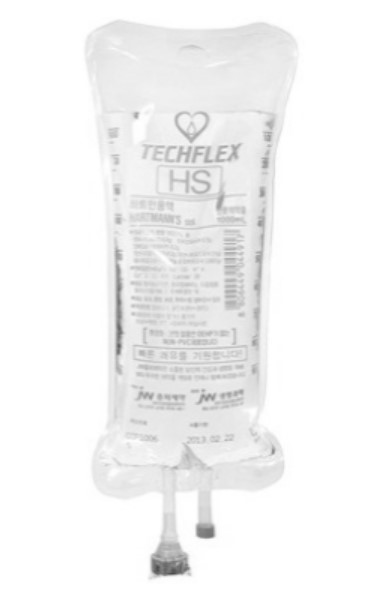

In [59]:
import cv2
import urllib.request
import numpy as np
from google.colab.patches import cv2_imshow # 수정된 부분

image_url = 'https://raw.githubusercontent.com/rich-hyun/medical_image/main/HS1.jpg'

# Adding headers to the request
req = urllib.request.Request(
    image_url,
    headers={'User-Agent': 'Mozilla/5.0'}
)

# Downloading the image and converting it to a byte array
resp = urllib.request.urlopen(req)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)

# Display the image using cv2_imshow instead of cv2.imshow
cv2_imshow(image) # 수정된 부분

In [60]:
from PIL import Image
import pytesseract
import requests
from io import BytesIO

# 이미지 URL 설정
image_url = 'https://raw.githubusercontent.com/rich-hyun/medical_image/main/HS1.jpg'

# requests를 사용하여 이미지 다운로드
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# OCR 처리 설정 (한글과 영어 인식)
custom_config = r'--oem 3 --psm 6 -l kor+eng'
text = pytesseract.image_to_string(image, config=custom_config)

print(text)

 . 로깅

+ HS] fl

은 ae =

==

noe ^ —
i!



##HD

##DWNAK1

##DWNAK2